In [35]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import math

In [193]:
myFile = uproot.open('alltestfiles.root')

In [194]:
tree = myFile['TestTree']

In [195]:
eventId = tree.array('eventId')
pfoId = tree.array('pfoId')
driftPos = tree.array('hitDriftPositionsW')
wirePos = tree.array('hitWirePositionsW')
pdg = tree.array('bestMCParticlePdgCode')
isTrack = tree.array('bestMCParticleIsTrack')
completeness = tree.array('completeness')
purity = tree.array('purity')
nHitsW = tree.array('nHitsInPfoW')
nHitsU = tree.array('nHitsInPfoU')
nHitsV = tree.array('nHitsInPfoV')

# Calculate means

In [196]:
drift_pos_av = driftPos.mean()
wire_pos_av = wirePos.mean()

# Calculate gradient

In [197]:
drift_comp = driftPos - drift_pos_av
wire_comp = wirePos - wire_pos_av
drift_comp_sq = drift_comp ** 2
numerator = (drift_comp * wire_comp).sum()
denominator = (drift_comp_sq).sum()
m = numerator / denominator
c = wire_pos_av - m * drift_pos_av

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [198]:
# #y values for regression line of PFO-0

# y = m[0]*driftPos[0] + c[0]

# #first x and y values for regression line of PFO-0
# origin_x = (y[0] - c[0]) / m[0]
# origin_y = y[0]

# print(origin_x, origin_y)

# #x and y values for random hit in PFO-0
# hit_x = driftPos[0][60]
# hit_y = wirePos[0][60]

# #gradient of line from regression line to hit
# m2 = (hit_y - origin_y) / (hit_x - origin_x)

# tan_theta = abs((m2 - m[0]) / (1 + m2 * m[0]))

# np.arctan(tan_theta) * (180 / np.pi)

# Cuts on purity and completeness

In [199]:
pfo_hits = np.array([ len(x) for x in driftPos])

track_pfos = np.where((completeness > 0.9) & (purity > 0.89) & (pfo_hits > 5) & isTrack == 1)

shower_pfos = np.where((completeness > 0.9) & (purity > 0.89) & (pfo_hits > 5) & isTrack == 0)

select_wirePos_tracks = wirePos[track_pfos]

select_driftPos_tracks = driftPos[track_pfos]

select_wirePos_showers = wirePos[shower_pfos]

select_driftPos_showers = driftPos[shower_pfos]

# Plot tracks

In [200]:
y_values_tracks = []
m_values_tracks = []
c_values_tracks = []

for i in track_pfos[0]:
    y = m[i]*driftPos[i] + c[i]
#     fig = plt.figure(figsize = (10, 15))
#     plt.scatter(driftPos[i], wirePos[i], color = 'b')
#     plt.plot(driftPos[i], y, color = 'r', linewidth = 3) 

    y_values_tracks.append(y)
    
    m_values_tracks.append(m[i])
    
    c_values_tracks.append(c[i])

# Plot showers

In [201]:
y_values_showers = []
m_values_showers = []
c_values_showers = []

for i in shower_pfos[0]:
    y = m[i]*driftPos[i] + c[i]
#     fig = plt.figure(figsize = (10, 15))
#     plt.scatter(driftPos[i], wirePos[i], color = 'b')
#     plt.plot(driftPos[i], y, color = 'r', linewidth = 3) 

    y_values_showers.append(y)
    
    m_values_showers.append(m[i])
    
    c_values_showers.append(c[i])

# Tracks: Get first x and y values for each PFO regression line

In [202]:
first_y_tracks = []
first_x_tracks = []

for i in range(len(y_values_tracks)):
    
    #Array of first x and y values for 32961 PFOs
    
    origin_y = y_values_tracks[i][0]
    
    origin_x = ((y_values_tracks[i][0]) - c[i]) / m[i]
    
    first_y_tracks.append(origin_y)
    
    first_x_tracks.append(origin_x)

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


# Showers: Get first x and y values for each PFO regression line


In [203]:
first_y_showers = []
first_x_showers = []

for i in range(len(y_values_showers)):
    
    #Array of first x and y values for 32961 PFOs
    
    origin_y = y_values_showers[i][0]
    
    origin_x = ((y_values_showers[i][0]) - c[i]) / m[i]
    
    first_y_showers.append(origin_y)
    
    first_x_showers.append(origin_x)

IndexError: index 0 is out of bounds for axis 0 with size 0

# Tracks: Calculate gradient of line between each hit and regression line

In [ ]:
m2_num_tracks = []
m2_denom_tracks = []

for i in range(len(first_y_tracks)):
    m2_num_tracks.append(first_y_tracks[i] - select_wirePos_tracks[i])
    
for i in range(len(first_x_tracks)):
    m2_denom_tracks.append(first_x_tracks[i] - select_driftPos_tracks[i])
    
m2_tracks = np.array(m2_num_tracks) / np.array(m2_denom_tracks)

# Showers: Calculate gradient of line between each hit and regression line


In [ ]:
m2_num_showers = []
m2_denom_showers = []

for i in range(len(first_y_showers)):
    m2_num_showers.append(first_y_showers[i] - select_wirePos_showers[i])
    
for i in range(len(first_x_showers)):
    m2_denom_showers.append(first_x_showers[i] - select_driftPos_showers[i])
    
m2_showers = np.array(m2_num_showers) / np.array(m2_denom_showers)

# Tracks: Calculate tan theta

In [ ]:
theta_tracks = []

for i in range(len(first_y_tracks)):
    
    tan_theta_num = m_values_tracks[i] - m2_tracks[i]
    
    tan_theta_denom = 1 + (m_values_tracks[i] * m2_tracks[i])
    
    tan_theta = abs(tan_theta_num / tan_theta_denom)
    
    theta_tracks.append(np.arctan(tan_theta))

In [ ]:
#Flatten the list of lists

tracks_angles = [y for x in theta_tracks for y in x]

# Showers: Calculate tan theta

In [ ]:
theta_showers = []

for i in range(len(first_y_showers)):
    
    tan_theta_num = m_values_showers[i] - m2_showers[i]
    
    tan_theta_denom = 1 + (m_values_showers[i] * m2_showers[i])
    
    tan_theta = abs(tan_theta_num / tan_theta_denom)
    
    theta_showers.append(np.arctan(tan_theta))

In [ ]:
showers_angles = [y for x in theta_showers for y in x]

# Plot distribution of angles

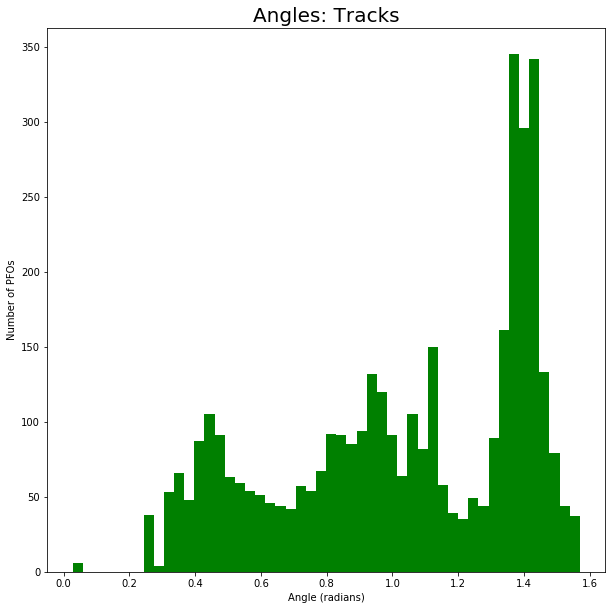

In [204]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(tracks_angles, 50, color = 'g')
plt.title('Angles: Tracks', fontsize = 20)
plt.xlabel('Angle (radians)')
plt.ylabel('Number of PFOs')

plt.show()

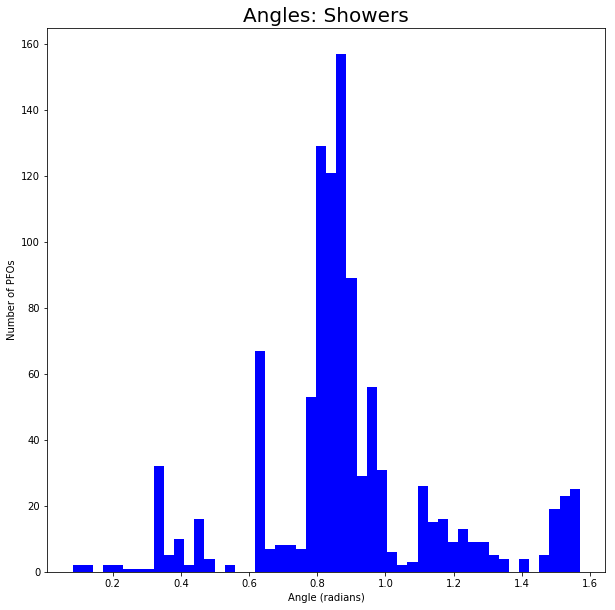

In [205]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(flattened_list, 50, color = 'b')
plt.title('Angles: Showers', fontsize = 20)
plt.xlabel('Angle (radians)')
plt.ylabel('Number of PFOs')

plt.show()

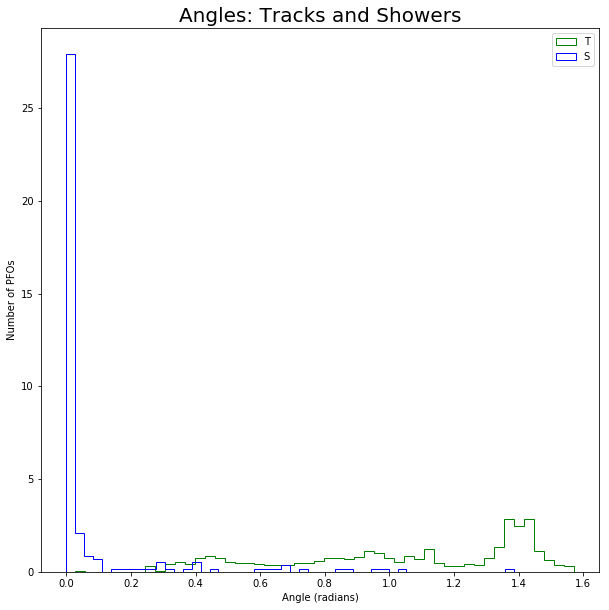

In [206]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(tracks_angles, 50, density = True, color = 'g', histtype = u'step')
plt.hist(showers_angles, 50, density = True, color = 'b', histtype = u'step')
plt.title('Angles: Tracks and Showers', fontsize = 20)
plt.xlabel('Angle (radians)')
plt.ylabel('Number of PFOs')


plt.legend('TS')
        
plt.show()